# Procesamiento de imágenes en paralelo con OpenCV

### Importar Librerias

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from time import time

### Funciones y variables globales

In [2]:
# variable Global
N = 10; # hilos o procesos
tiempo_secuencial = 0
tiempo_paralelo_hilos = 0
tiempo_paralelo_datos = 0
tiempo_paralelo_tareas = 0
args = {
    "imagen": "gato.jpg" # Imagen
}

In [3]:
def mostrar_imagen(titulo,imagen): # captura la imagen y lo transforma de BGR a RGB
  #imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB) 
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show

In [4]:
def dividir_imagen():
    # dividimos en ancho de la imagen
    a = w//N # retorna un número entero
    arr = []
    for i in range(N): # 0 a 3
        tl = imagen[0:h, a*i:a*(i+1)]
        arr.append(tl)
    return arr

In [5]:
def mostrar_imagen_partes(partes): # mostramos las N partes de la imagen
    for i in range(N): 
        plt.subplot(1,N,i+1)
        plt.xticks([]), plt.yticks([]) # Quita los números de los ejes
        #arr[i] = cv2.cvtColor(partes[i],cv2.COLOR_BGR2RGB)
        plt.tight_layout(pad=1) # pad es la separación entre las partes
        plt.imshow(partes[i])
    plt.show()

In [6]:
def aplicar_BN(partes): # Convierte el subconjunto a escala de grises
    ab = cv2.cvtColor(partes,cv2.COLOR_BGR2GRAY)
    return cv2.cvtColor(ab, cv2.COLOR_BGR2RGB)

In [7]:
def combinar_partes(partes):
    return np.hstack(partes)

### Visualización de la imagen

<class 'numpy.ndarray'>


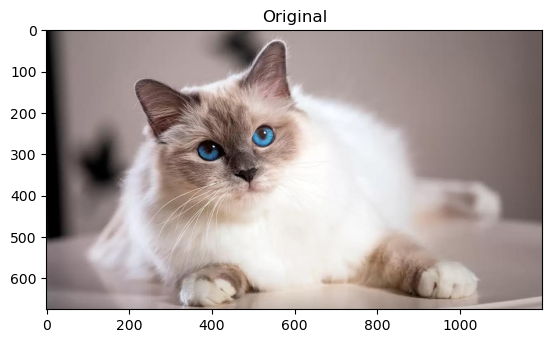

In [8]:
imagen = cv2.imread(args["imagen"]) # leemos la imagen de la variable global
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)

mostrar_imagen("Original", imagen) # mostramos la imagen
print(type(imagen))

In [9]:
# Dimensiones de la imagen: h = alto w = ancho
(h, w) = imagen.shape[:2]

print("Altura de la imagen: %d"%(h))
print("Ancho de la imagen: %d"%(w))

Altura de la imagen: 675
Ancho de la imagen: 1200


# 1. Procesamiento Secuencial

0.020028114318847656 segundos


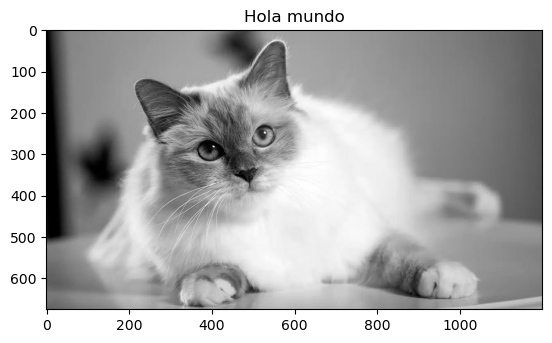

In [10]:
start = time()
imagenBNSE = aplicar_BN(imagen)
mostrar_imagen("Hola mundo",imagenBNSE)
end = time()

tiempo_secuencial = end - start
print(tiempo_secuencial, 'segundos')

# 2. Procesamiento Paralelo: Paralelismo de Tareas

# 3. Procesamiento Paralelo: Paralelismo de Datos

# 4. Procesamiento Paralelo: Paralelismo con hilos

### Dividimos la imagen en N partes

In [11]:
arr = dividir_imagen()

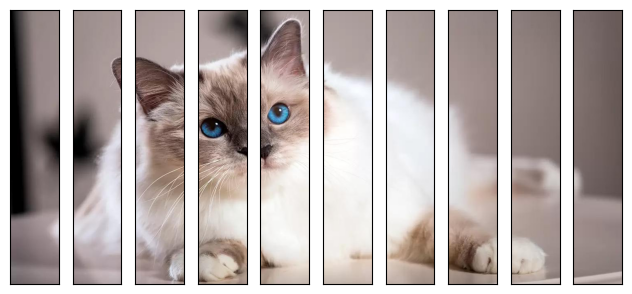

In [12]:
mostrar_imagen_partes(arr)

### Procesamiento en paralelo

In [13]:
import concurrent.futures

0.022001266479492188 segundos


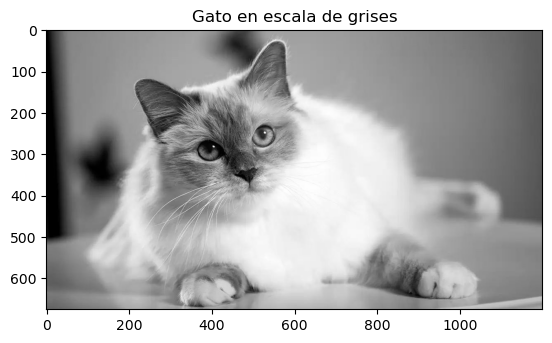

In [14]:
result = [] # partes de la imagen

inicio = time()
imagen_partes = dividir_imagen()
with concurrent.futures.ThreadPoolExecutor(max_workers=N) as executor: # N hilos
    resultados = executor.map(aplicar_BN, imagen_partes)

for resultado in resultados:
    result.append(resultado)

imagenBN = combinar_partes(result) # juntamos las partes en escala de grises
mostrar_imagen("Gato en escala de grises",imagenBN)

fin = time()
tiempo_paralelo_tareas = fin - inicio
print(tiempo_paralelo_tareas, 'segundos')

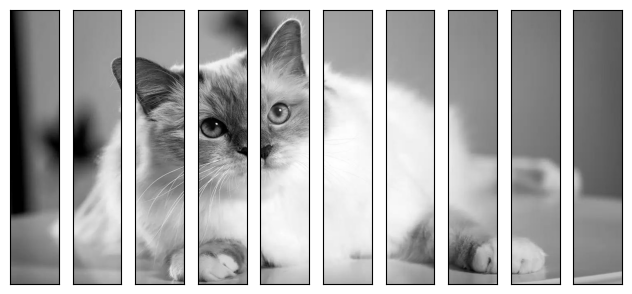

In [15]:
mostrar_imagen_partes(result)

# 5. Comparación de tiempos